In [2]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

# 1. 
Générez un ensemble de données 2-D (voir figure ci-dessous) qui est composé de deux
classes (notées -1 et 1) linéairement séparables d’objets répartis uniformément. Générez 50
objets pour chaque classe. Un moyen facile est de faire cela pour les coordonnées x et y
séparément et les combiner ensuite. Étiquetez les variables par «area» et «perimeter».

# 2. 
Vérifiez le résultat obtenu en utilisant scatter et en récupérant les étiquettes des données et
les étiquettes des variables. On va utiliser une matrice

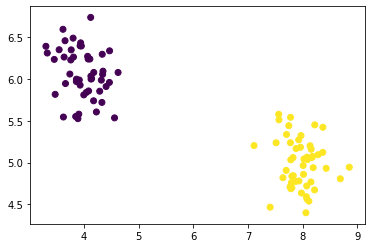

In [3]:
#Generation des donnees
#CONST
centers_=[(4,6), (8,5)]
nb_data = 100
data, target = datasets.make_blobs(n_samples=nb_data, n_features=2, centers=centers_, cluster_std=0.3)
def change(t):
    if t == 0: return -1
    else: return 1
target = [change(t) for t in target]
# target[target==0] = -1.
target_names = ["Area", "Perimeter"]
plt.figure()
plt.scatter(data[:,0], data[:, 1], c=target)

# 3. 
On considère un réseau de type Adaline. On veut apprendre l’ensemble d'associations entre
les données et les classes. L’algorithme d’apprentissage est le suivant (voir le cours) :
![image](images/adaline.png)

# 4. 
Ecrire une fonction **err_adal** permettant de calculer l’écart entre la sortie désirée (classe) et
la sortie calculée par Adaline.

In [4]:
def err_adal(x, y, weights):
    """ err_adal : calcul l'ecart entre la sortie desiree
        et la sortie calculee
    """
    return y - np.vdot(weights, x)

# 5. 
Ecrire une fonction **grad_adal** permettant de calculer une approximation du gradient.

In [5]:
def grad_adal(x, error):
    return np.dot(-2, np.dot(error, x))

# 6. 
Ecrire une fonction **adapt_adal** permettant de mettre à jour les poids des connexions dans
Adaline en fonction du gradient.

In [6]:
def adapt_adal(weights, learning_rate, tr_data, k, error):
    #Adapter les poids
    weights = np.subtract(weights, np.dot(learning_rate, grad_adal(tr_data[k], error)))
    return weights

# 7.
Ecrire une fonction **Adaline** utilisant les fonctions précédentes permettant de faire un
apprentissage du modèle Adaline sur la base de données générée précédemment. On
utilisera la fonction de transition indiquée dans la figure ci-dessous, ainsi que les valeurs
initiales des poids et un pas du gradient de ***ε=0.1***.

In [7]:
def Adaline(x, y, weights=None, learning_rate=0.1, max_iter=2000, error_threshold=0.1):
    """ apprentissage de adaline """
    #CONSTANTS
    nb_data = x.shape[0]
    nb_features = x.shape[1]

    # Vérifier si les poids sont données
    if weights is None: 
        # 1) generer des poids aleatoire
        weights = np.random.normal(size=(1, nb_features+1))

    #Completer - Ajout de la colonne biais
    tr_data = np.hstack((np.ones((nb_data, 1)), x))
    itr = 1
    while itr < max_iter:
        # 2) indice aléatoire
        k = np.random.randint(low=0, high=nb_data)
        itr += 1
        # 3) ecart
        error = err_adal(tr_data[k], y[k],  weights)
        # 4) grad
        #grad = grad_adal(tr_data[k], error)
        
        # (critere d'arret)
        if abs(error) < error_threshold: 
            break
    # adapter les poids
    weights = adapt_adal(weights, learning_rate, tr_data, k, error)
    return weights

In [8]:
def transition(a):
    if a > 0: return 1
    else: return -1

In [9]:
def predict(w, x):
    y = []
    for j in range(len(x)):
        y.append(transition(np.vdot(w[1:], x[j])+w[0]))
    return y

In [10]:
def plot_ada(x, y, w):
        #Droite
        # w_0 x a + w_1 x b + w_3 = 0.
        #Calcul coef
        a = -(w[0]/w[1])
        b = -(w[2]/w[1])
        yc = predict(w, x)
        #TODO:
        # fix all !!!!!!!!!!!!!!!!!!
        plt.figure()
        plt.scatter(data[:,0], data[:, 1], c=yc)
        
        x1_min = min(data[:, 0]) - 1
        x1_max = max(data[:, 0]) + 1
        x2_min = min(data[:, 1]) - 1
        x2_max = max(data[:, 1]) + 1
        resolution =  0.02
        x_abs = np.arange(x1_min, x1_max, resolution)
        y_abs = a * x_abs + b
        #plt.ylim((yMin, yMax))
        #plt.xlim((xMin, xMax))
        plt.plot(x_abs,y_abs)

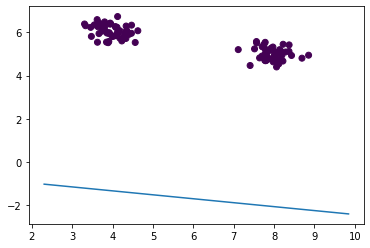

In [11]:
weights = Adaline(data, target, weights=None, learning_rate=0.1, max_iter=5000, error_threshold=0.01)
w = weights[0]
plot_ada(data, target, w)

# 8.
A chaque itération de l’apprentissage représenter graphiquement dans un même repère
orthogonal l’ensemble des échantillons et l’hyperplan séparant les deux classes.

In [12]:
def AdalineVerbose(x, y, weights=None, learning_rate=0.1, max_iter=2000, error_threshold=0.1):
    """ apprentissage de adaline """
    #CONSTANTS
    nb_data = x.shape[0]
    nb_features = x.shape[1]

    # Vérifier si les poids sont données
    if weights is None: 
        # 1) generer des poids aleatoire
        weights = np.random.normal(size=(1, nb_features+1))

    #Completer - Ajout de la colonne biais
    tr_data = np.hstack((np.ones((nb_data, 1)), x))
    itr = 1
    while itr < max_iter:
        # 2) indice aléatoire
        k = np.random.randint(low=0, high=nb_data)
        itr += 1
        # 3) ecart
        error = err_adal(tr_data[k], y[k],  weights)
        # 4) grad
        #grad = grad_adal(tr_data[k], error)
        
        # (critere d'arret)
        if abs(error) < error_threshold: 
            break
        # adapter les poids
        weights = adapt_adal(weights, learning_rate, tr_data, k, error)
        w = weights[0]
        plt.title("à t = %d"%itr)
        plot_ada(data, target, w)
        

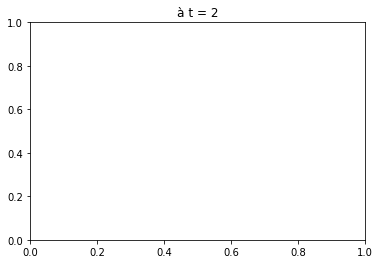

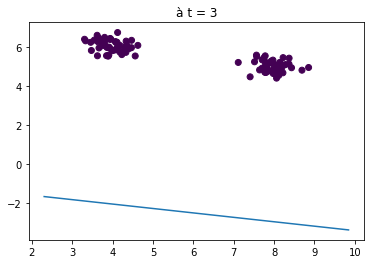

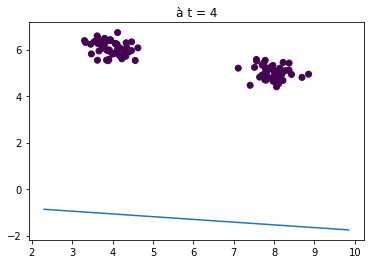

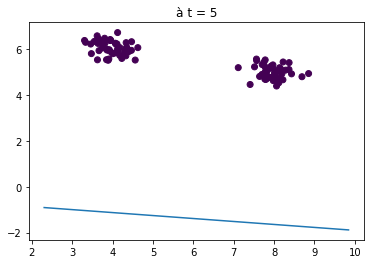

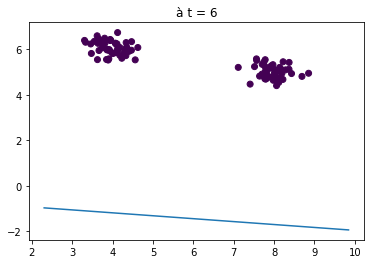

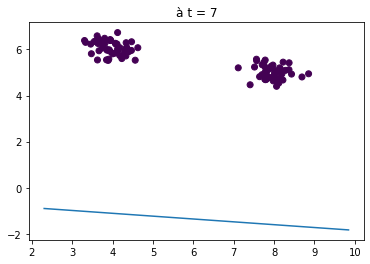

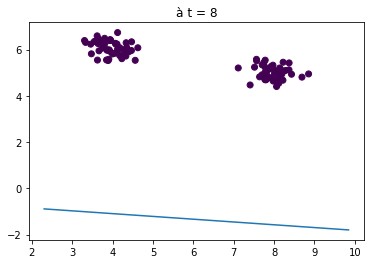

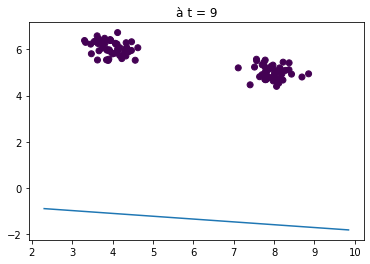

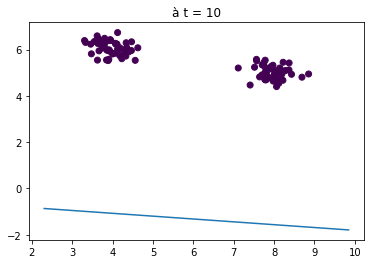

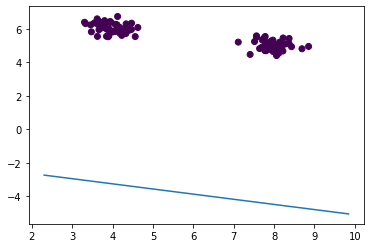

In [13]:
AdalineVerbose(data, target, weights=None, learning_rate=0.1, max_iter=10, error_threshold=0.1)

# 9. 
On propose de traiter les mêmes données avec cette fois le Perceptron dont l’algorithme est
donné ci-dessous :

![image](images/perceptron.png)

Ecrire une fonction **sortie_perc** permettant de calculer la sortie calculée par le Perceptron.

In [14]:
def sortie_perc(w, x):
    y = []
    for j in range(len(x)):
        y.append(transition(np.vdot(w[1:], x[j])+w[0]))
    return y

# 10. 
Ecrire une fonction **grad_perc** permettant de calculer une approximation du gradient.


In [15]:
def grad_perc(x, error):
    return np.dot(-2, np.dot(error, x))

# 11. 
Ecrire une fonction **adapt_perc** permettant de mettre à jour les poids des connexions dans
Adaline en fonction du gradient.


In [16]:
def adapt_perc(weights, learning_rate, tr_data, k, error):
    #Adapter les poids
    if np.vdot(weights, tr_data[k]) > 0 and target[k] != 1:
        weights = np.subtract(weights, np.dot(learning_rate, grad_perc(tr_data[k], error)))           
    elif np.vdot(weights, tr_data[k]) < 0 and target[k] != -1:
        weights = np.subtract(weights, np.dot(learning_rate, grad_perc(tr_data[k], error)))
    return weights

# 12. 
Ecrire une fonction perceptron utilisant les fonctions précédentes permettant de faire un
apprentissage du modèle Perceptron sur la même base de données qu’Adaline. On utilisera
les valeurs d’initialisation données dans la question 7.

In [17]:
def Perceptron(x, y, weights=None, learning_rate=0.1, max_iter=2000, error_threshold=0.1):
    """ apprentissage de Perceptron """
    #CONSTANTS
    nb_data = x.shape[0]
    nb_features = x.shape[1]

    # Vérifier si les poids sont données
    if weights is None: 
        # 1) generer des poids aleatoire
        weights = np.random.normal(size=(1, nb_features+1))

    #Completer - Ajout de la colonne biais
    tr_data = np.hstack((np.ones((nb_data, 1)), x))
    itr = 1
    while itr < max_iter:
        # 2) indice aléatoire
        k = np.random.randint(low=0, high=nb_data)
        itr += 1
        # 3) ecart
        error = err_adal(tr_data[k], y[k],  weights)
        # 4) grad
        #grad = grad_adal(tr_data[k], error)
        
        
        # (critere d'arret)
        if abs(error) < error_threshold: 
            break
    # adapter les poids
    weights = adapt_perc(weights, learning_rate, tr_data, k, error)
    
    return weights

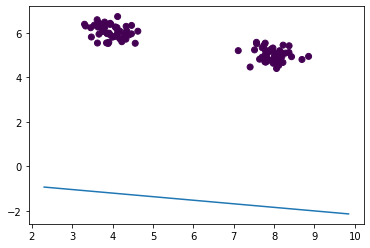

In [18]:
weights = Perceptron(data, target, weights=None, learning_rate=0.1, max_iter=5000, error_threshold=0.01)
w = weights[0]
plot_ada(data, target, w)

# 13.
A chaque itération de l’apprentissage représenter graphiquement dans un même repère
orthogonal l’ensemble des échantillons et l’hyperplan séparant les deux classes.

In [19]:
def PerceptronVerbose(x, y, weights=None, learning_rate=0.1, max_iter=2000, error_threshold=0.1):
    """ apprentissage de Perceptron """
    #CONSTANTS
    nb_data = x.shape[0]
    nb_features = x.shape[1]

    # Vérifier si les poids sont données
    if weights is None: 
        # 1) generer des poids aleatoire
        weights = np.random.normal(size=(1, nb_features+1))

    #Completer - Ajout de la colonne biais
    tr_data = np.hstack((np.ones((nb_data, 1)), x))
    itr = 1
    while itr < max_iter:
        # 2) indice aléatoire
        k = np.random.randint(low=0, high=nb_data)
        itr += 1
        # 3) ecart
        error = err_adal(tr_data[k], y[k],  weights)
        # 4) grad
        #grad = grad_adal(tr_data[k], error)
        
        # adapter les poids
        weights = adapt_perc(weights, learning_rate, tr_data, k, error)
        w = weights[0]
        plt.title("à t = %d"%itr)
        plot_ada(data, target, w)
        # (critere d'arret)
        if abs(error) < error_threshold: 
            break
    
    return weights

array([[ 24240.83194861, 200280.60436971, 123563.92947987]])

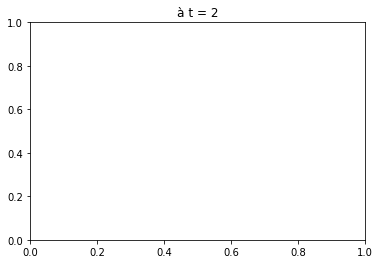

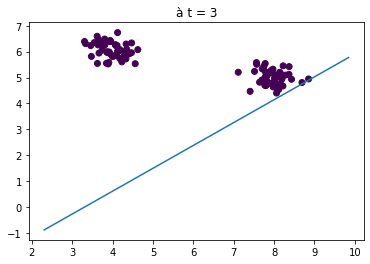

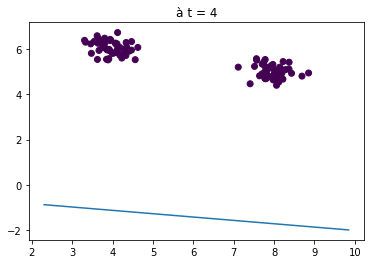

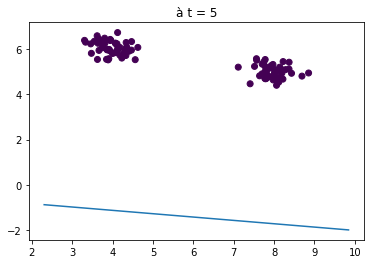

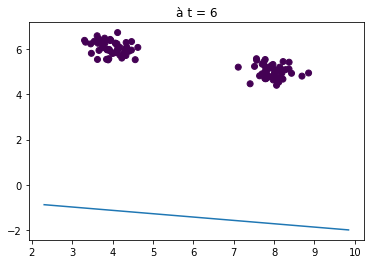

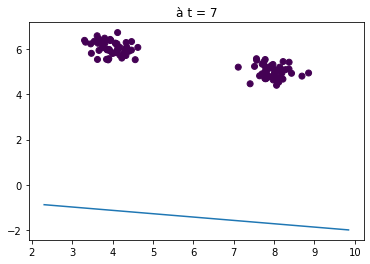

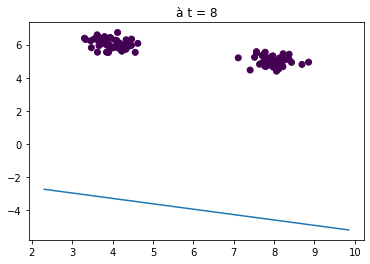

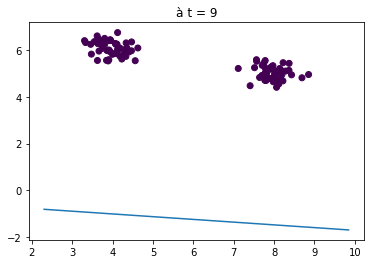

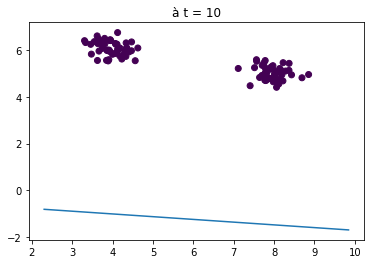

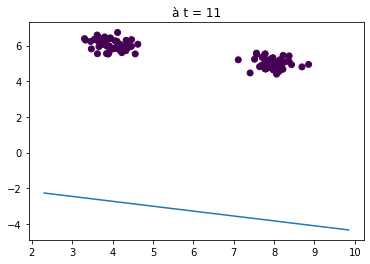

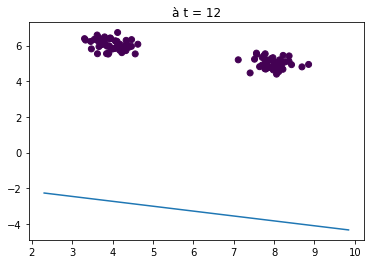

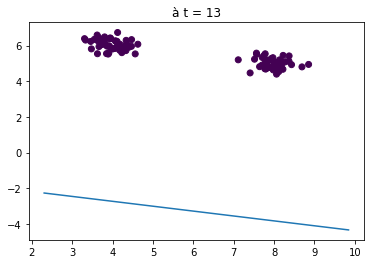

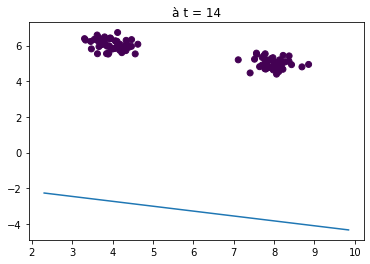

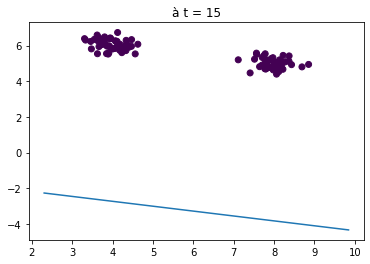

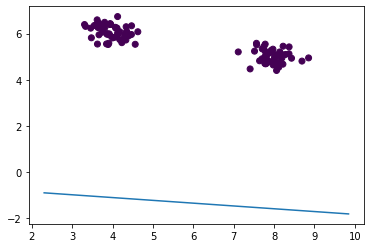

In [20]:
PerceptronVerbose(data, target, weights=None, learning_rate=0.1, max_iter=15, error_threshold=0.1)